<a href="https://colab.research.google.com/github/AparnaRajTR/Deep_learning/blob/main/11_time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q tensorflow-gpu

     |████████████████████████████████| 588.3 MB 20 kB/s 
     |████████████████████████████████| 1.7 MB 56.3 MB/s 
     |████████████████████████████████| 439 kB 74.5 MB/s 
     |████████████████████████████████| 6.0 MB 62.6 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.9.2 requires flatbuffers<2,>=1.12, but you have flatbuffers 22.12.6 which is incompatible.
tensorflow 2.9.2 requires keras<2.10.0,>=2.9.0rc0, but you have keras 2.11.0 which is incompatible.
tensorflow 2.9.2 requires tensorboard<2.10,>=2.9, but you have tensorboard 2.11.0 which is incompatible.
tensorflow 2.9.2 requires tensorflow-estimator<2.10.0,>=2.9.0rc0, but you have tensorflow-estimator 2.11.0 which is incompatible.


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 16, 10

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

In [3]:
time = np.arange(0, 100, 0.1)
sin = np.sin(time) + np.random.normal(scale=0.5, size=len(time))

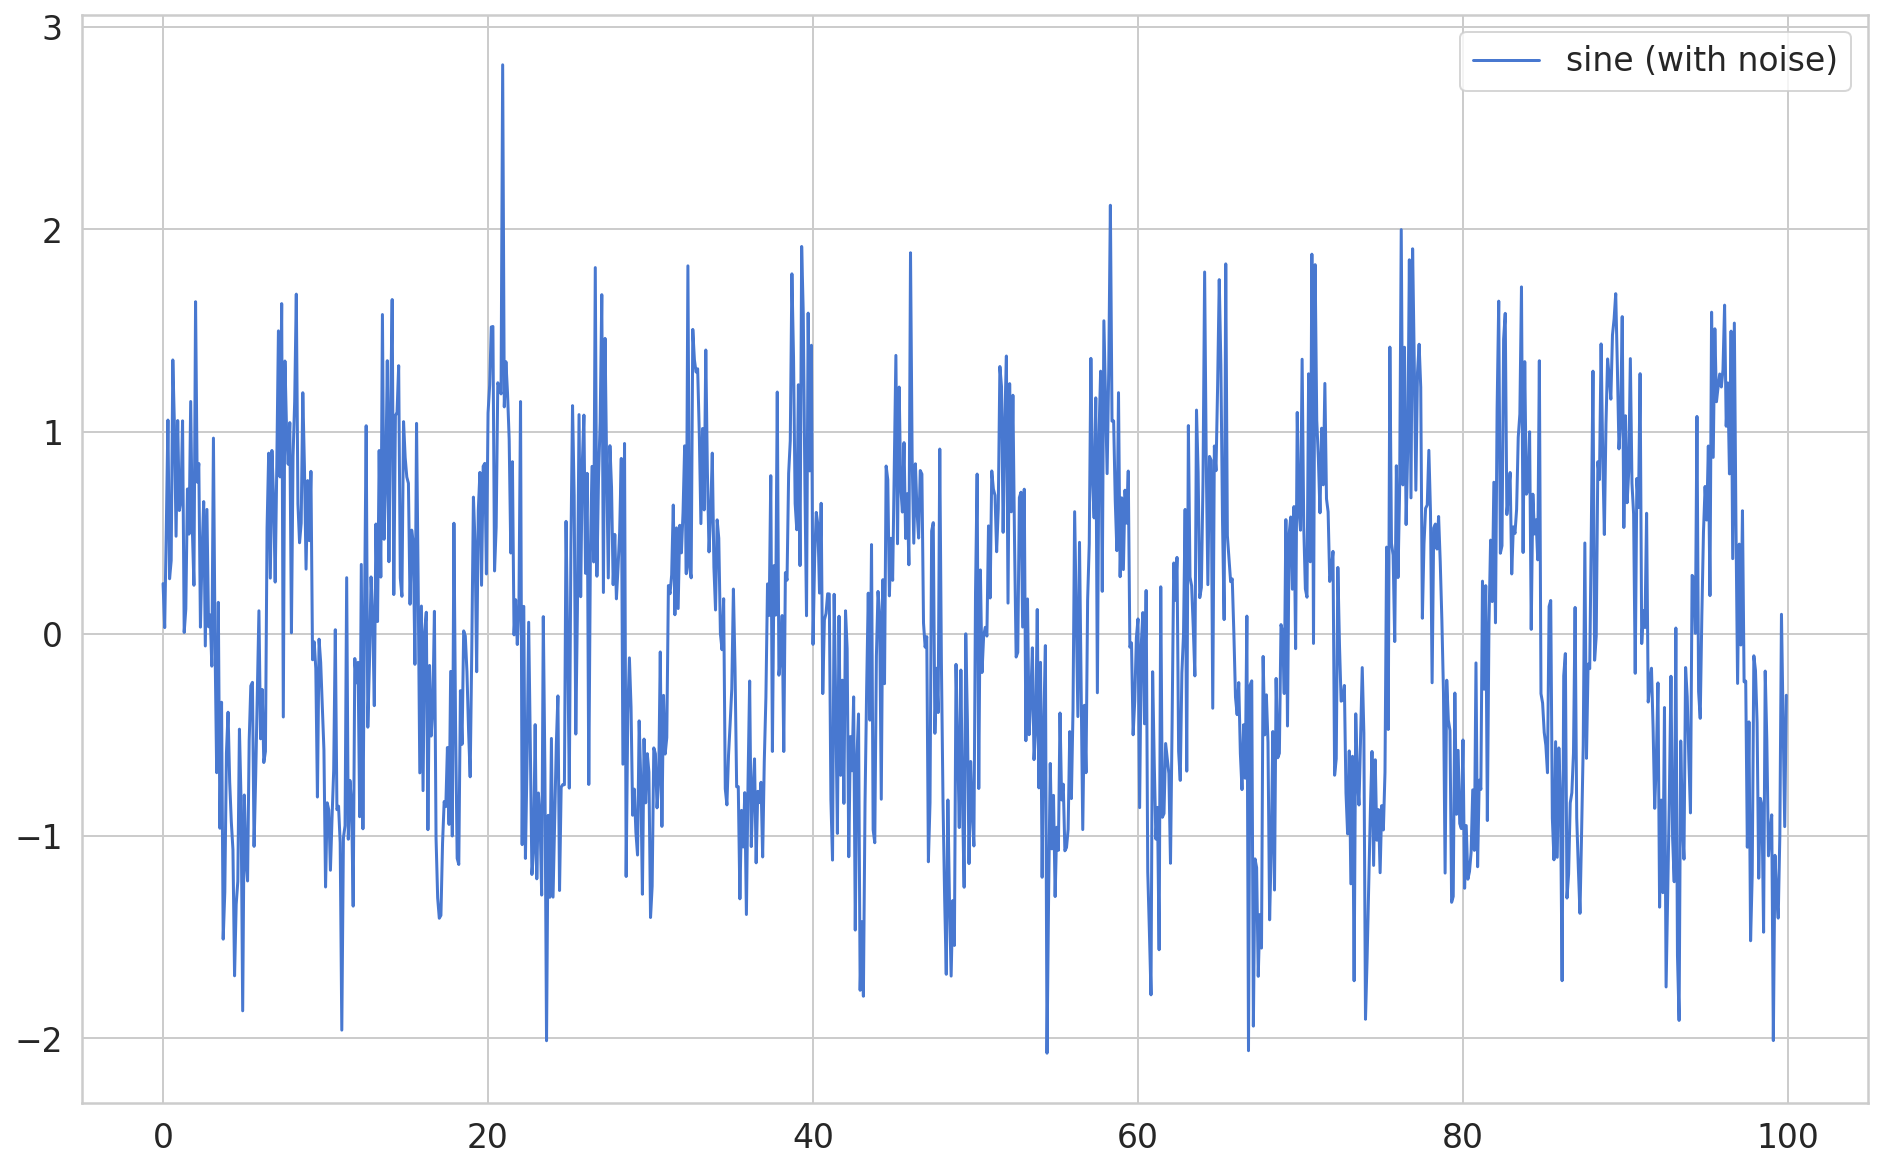

In [4]:
plt.plot(time, sin, label='sine (with noise)');
plt.legend();

# Data Preprocessing

In [5]:
df = pd.DataFrame(dict(sine=sin), index=time, columns=['sine'])
df.head()

,sine
0.0,0.248357
0.1,0.030701
0.2,0.522514
0.3,1.057035
0.4,0.272342


In [6]:
train_size = int(len(df) * 0.8)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(len(train), len(test))

800 200


In [7]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)        
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [8]:
time_steps = 10

# reshape to [samples, time_steps, n_features]

X_train, y_train = create_dataset(train, train.sine, time_steps)
X_test, y_test = create_dataset(test, test.sine, time_steps)

print(X_train.shape, y_train.shape)

(790, 10, 1) (790,)


In [9]:
X_train[0]

array([[0.24835708],
       [0.03070127],
       [0.5225136 ],
       [1.05703513],
       [0.27234165],
       [0.36235706],
       [1.35424888],
       [1.02793505],
       [0.4826189 ],
       [1.05460693]])

In [10]:
y_train[0]

0.6097621384016654

# Modeling

In [11]:
model = keras.Sequential()
model.add(keras.layers.LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(keras.layers.Dense(1))
model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(0.001))

## Training

In [12]:
history = model.fit(
    X_train, y_train, 
    epochs=30, 
    batch_size=16, 
    validation_split=0.1, 
    verbose=1, 
    shuffle=False
)

Epoch 1/30
45/45 [==============================] - 7s 15ms/step - loss: 0.4005 - val_loss: 0.3572
Epoch 2/30
45/45 [==============================] - 0s 5ms/step - loss: 0.3261 - val_loss: 0.3232
Epoch 3/30
45/45 [==============================] - 0s 5ms/step - loss: 0.3192 - val_loss: 0.3206
Epoch 4/30
45/45 [==============================] - 0s 5ms/step - loss: 0.3180 - val_loss: 0.3181
Epoch 5/30
45/45 [==============================] - 0s 5ms/step - loss: 0.3169 - val_loss: 0.3162
Epoch 6/30
45/45 [==============================] - 0s 5ms/step - loss: 0.3161 - val_loss: 0.3146
Epoch 7/30
45/45 [==============================] - 0s 5ms/step - loss: 0.3154 - val_loss: 0.3132
Epoch 8/30
45/45 [==============================] - 0s 5ms/step - loss: 0.3147 - val_loss: 0.3119
Epoch 9/30
45/45 [==============================] - 0s 5ms/step - loss: 0.3139 - val_loss: 0.3105
Epoch 10/30
45/45 [==============================] - 0s 5ms/step - loss: 0.3131 - val_loss: 0.3094
Epoch 11/30
45/45 

## Evaluation

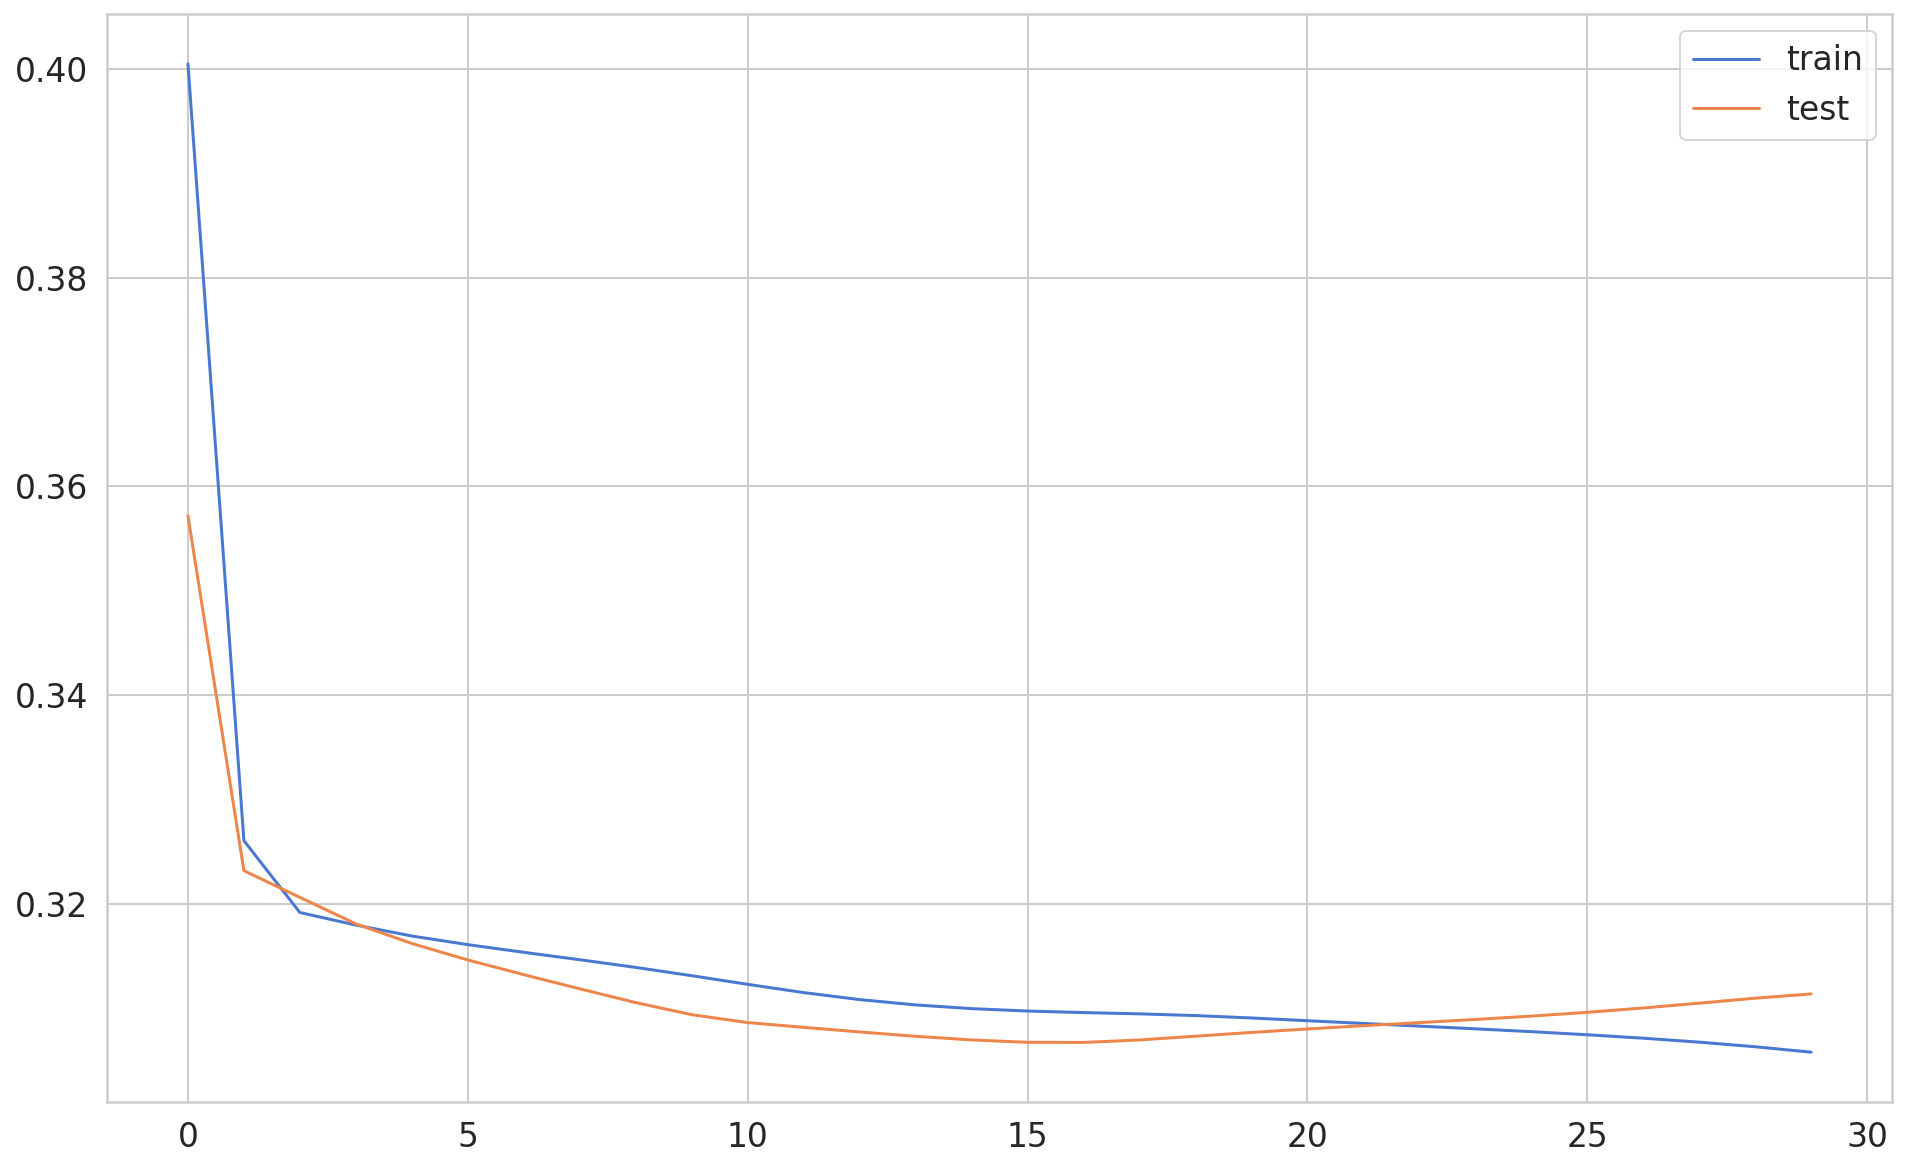

In [13]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend();

In [14]:
y_pred = model.predict(X_test)

6/6 [==============================] - 0s 3ms/step


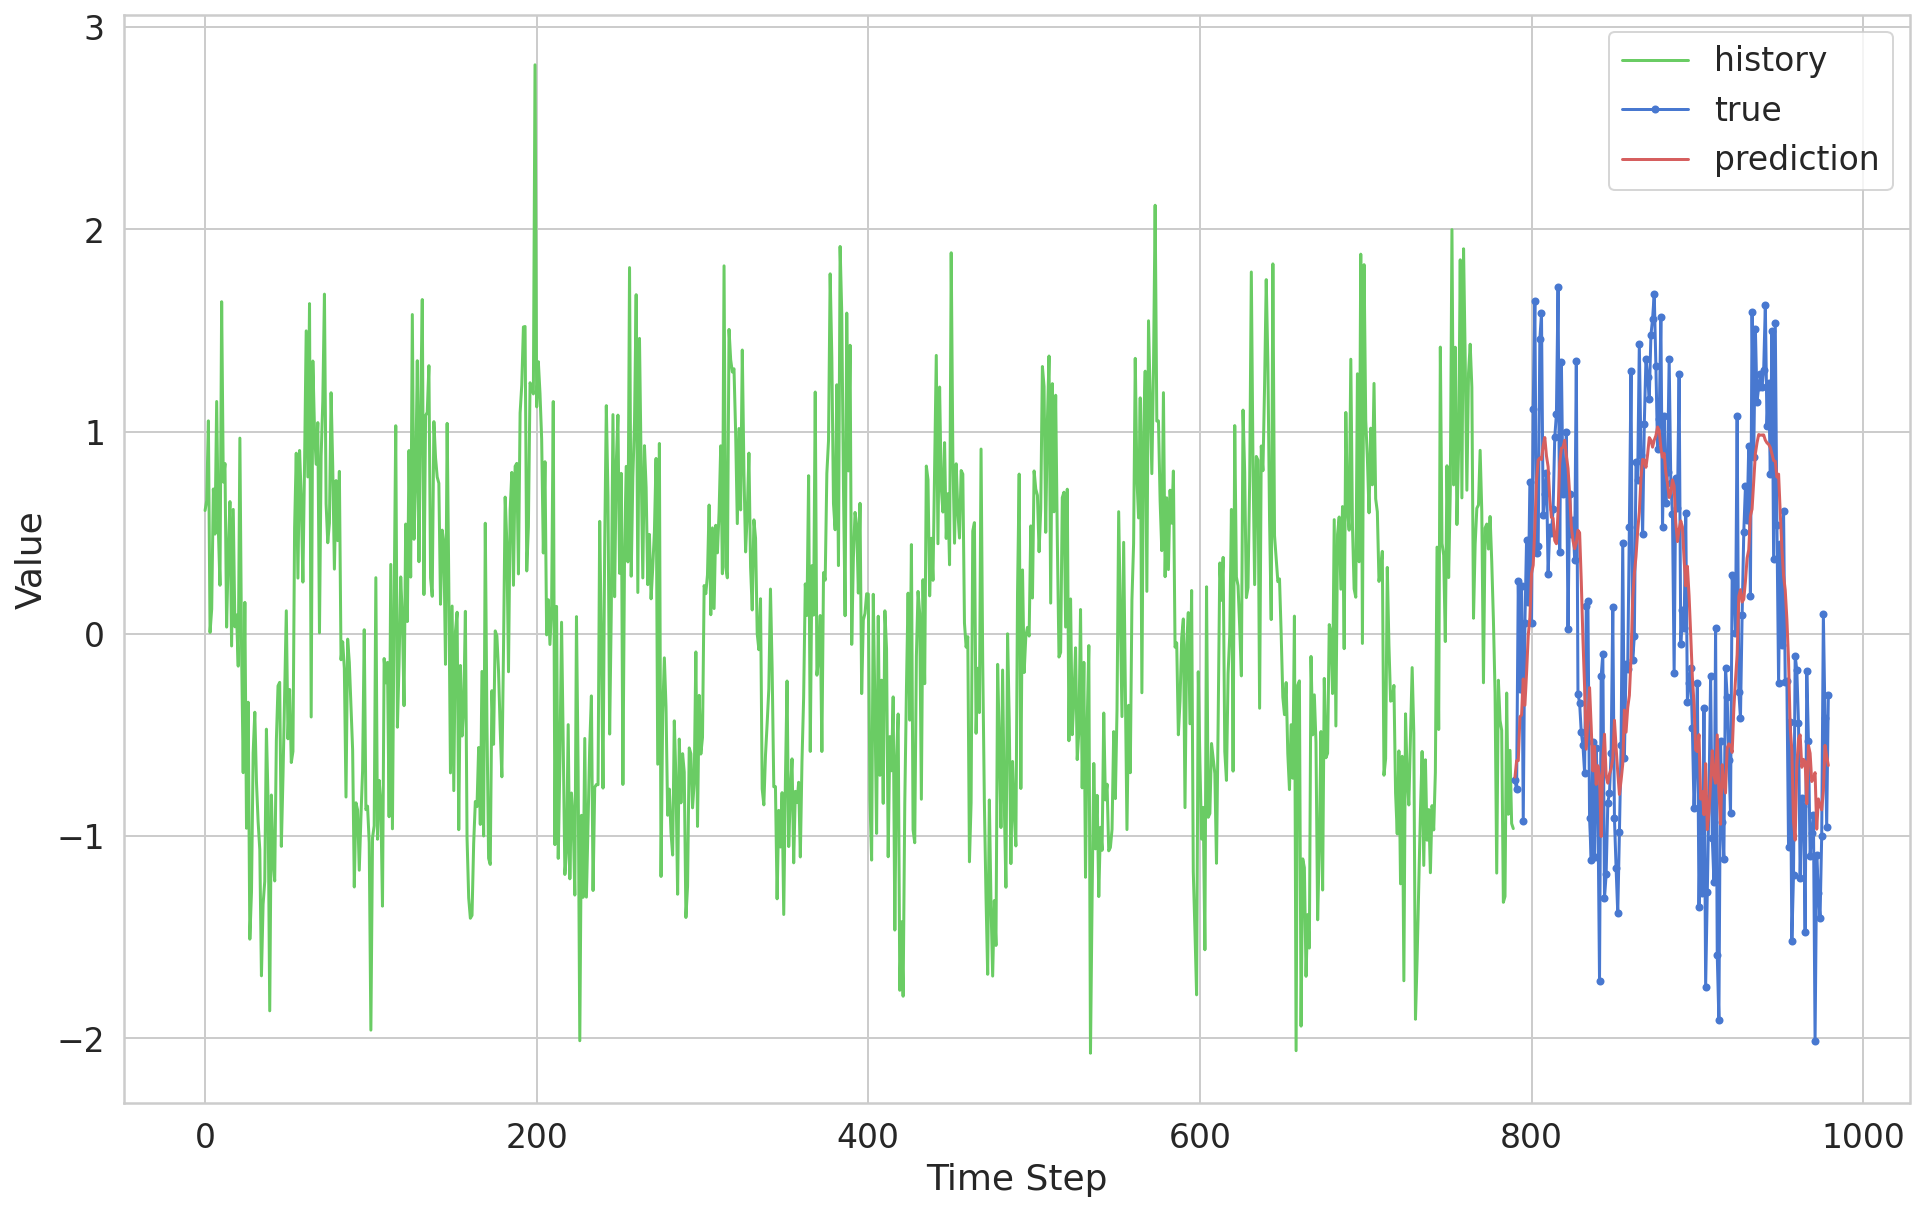

In [15]:
plt.plot(np.arange(0, len(y_train)), y_train, 'g', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();

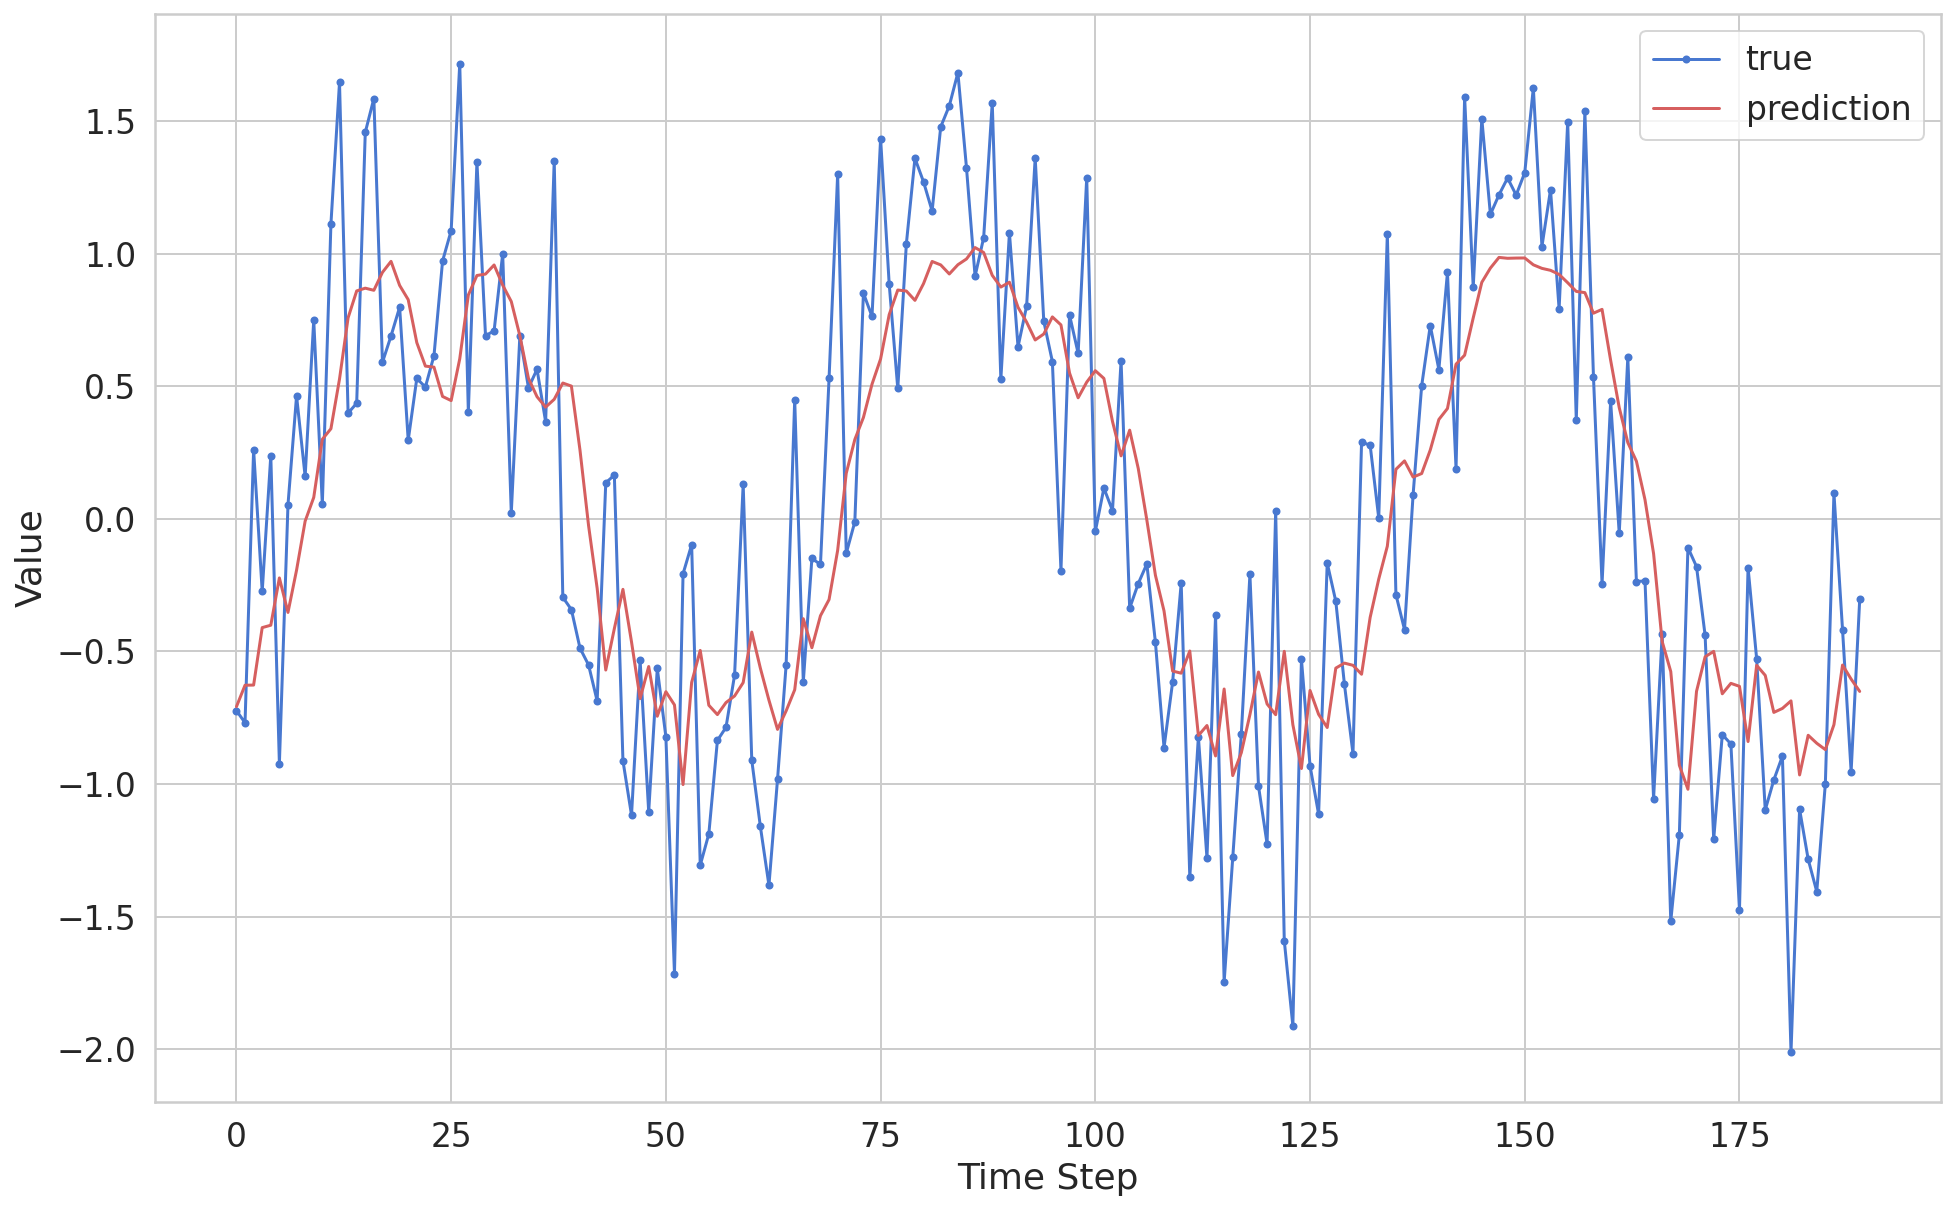

In [16]:

plt.plot(y_test, marker='.', label="true")
plt.plot(y_pred, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();